In [1]:
from ENDFtk.tree import Tape
from NDSampler import NDSampler, SamplerSettings, generate_covariance_dict
import numpy as np
import glob
import matplotlib.pyplot as plt

endf_tape = Tape.from_file('/home/sole-pie01/ndlib/endfb8-neutron/n-090_Th_232.endf')
covariance_dict = generate_covariance_dict(endf_tape)
del covariance_dict[31]
del covariance_dict[32][151][0] #No RRR
del covariance_dict[33]
del covariance_dict[34]
# del covariance_dict[35]
covariance_dict

{32: {151: [1]}}

In [2]:
samplerSettings = SamplerSettings(sampling='LHS', widths_to_reduced=True, debug=True)
# covariance_data_Pu9.hdf5
sampler = NDSampler(endf_tape, covariance_dict=covariance_dict, settings=samplerSettings, hdf5_filename="covariance_data_U238.hdf5")
sampler.sample(num_samples = 3) 

Generating 3 samples using LHS method...

=== Debug Output for URR Breit-Wigner (Transformed Samples) ===
Number of parameters: 830
Number of samples: 3
Sampling method: LHS

Transformed sample matrix (first 5 samples, first 10 parameters):
Sample 1: [2.12973625e+01 1.64117704e-03 2.12543431e+01 2.02472682e-03
 2.11218887e+01 2.25938235e-03 2.08489235e+01 2.20979519e-03
 2.09025518e+01 2.44642086e-03]
Sample 2: [2.12313777e+01 2.21353869e-03 2.12870172e+01 2.48766712e-03
 2.09410114e+01 2.13760898e-03 2.10867754e+01 2.38734762e-03
 2.11151939e+01 1.94442140e-03]
Sample 3: [2.10455266e+01 2.41923998e-03 2.10012878e+01 2.11250543e-03
 2.12985387e+01 1.97241746e-03 2.12837780e+01 1.89715177e-03
 2.12734261e+01 2.21966120e-03]

Parameter verification (first 10 parameters):
Parameter            Nominal      Uncertainty  Ratio       
D_L0_J0_E0           21.1954      0.211954     0.01        
GN_L0_J0_E0          0.00216681   0.000216681  0.1         
D_L0_J0_E1           21.1709      0.2117

In [13]:
np.sqrt(0.01)*100

np.float64(10.0)

In [18]:
endf_tape = Tape.from_file('/home/sole-pie01/ndlib/endfb8-neutron/n-090_Th_232.endf')
MAT = endf_tape.MAT(endf_tape.material_numbers[0])
mf32 = endf_tape.MAT(endf_tape.material_numbers[0]).MF(32).MT(151).parse()
mf32_resonance_range = mf32.isotopes[0].resonance_ranges[1]

# mf32_resonance_range.parameters.covariance_matrix.covariance_matrix.to_list()[:]

NPAR = mf32_resonance_range.parameters.covariance_matrix.NPAR  # Total number of parameters

# Extract the relative covariance matrix (upper triangular form)
relative_cov_matrix_upper = mf32_resonance_range.parameters.covariance_matrix.covariance_matrix

# Convert to full symmetric matrix
relative_cov_matrix_spin = np.zeros((NPAR, NPAR))
triu_indices = np.triu_indices(NPAR)
relative_cov_matrix_spin[triu_indices] = relative_cov_matrix_upper
relative_cov_matrix_spin = relative_cov_matrix_spin + relative_cov_matrix_spin.T - np.diag(np.diag(relative_cov_matrix_spin))

print(np.diag(relative_cov_matrix_spin))

[1.000000e-09 4.078483e-04 1.721822e-03 1.000000e-09 1.657272e-03
 1.375195e-03 1.000000e-09 1.657272e-03 1.375195e-03 1.000000e-09
 4.086986e-02 1.721822e-03 1.000000e-09 4.086986e-02 1.721822e-03]


In [22]:
np.sqrt(4.086986e-02)*100

np.float64(20.216295407418244)

In [6]:
import pandas as pd

transformed_df = pd.read_csv('transformed_samples_URR_BW.csv')
transformed_df.head()

,# Row,D_L0_J0_E0,GN_L0_J0_E0,D_L0_J0_E1,GN_L0_J0_E1,D_L0_J0_E2,GN_L0_J0_E2,D_L0_J0_E3,GN_L0_J0_E3,D_L0_J0_E4,...,D_L0_J0_E5,GN_L0_J0_E5,D_L0_J0_E6,GN_L0_J0_E6,D_L0_J0_E7,GN_L0_J0_E7,D_L0_J0_E8,GN_L0_J0_E8,D_L0_J0_E9,GN_L0_J0_E9
0,Nominal,21.195390,0.002167,21.170890,0.002163,21.134190,0.002158,21.097570,0.002154,21.048830,...,21.012360,0.002142,21.000210,0.002141,20.951710,0.002134,20.903330,0.002128,20.891250,0.002126
1,Uncertainty,0.211954,0.000217,0.211709,0.000216,0.211342,0.000216,0.210976,0.000215,0.210488,...,0.210124,0.000214,0.210002,0.000214,0.209517,0.000213,0.209033,0.000213,0.208913,0.000213
2,Mean,21.195177,0.002167,21.171012,0.002163,21.134140,0.002159,21.096669,0.002152,21.048456,...,21.012839,0.002143,20.999381,0.002141,20.951540,0.002135,20.903086,0.002128,20.891239,0.002125
3,StdDev,0.208471,0.000213,0.209418,0.000216,0.207440,0.000212,0.207967,0.000212,0.208251,...,0.205679,0.000211,0.205127,0.000210,0.206708,0.000213,0.205040,0.000207,0.203863,0.000209
4,MeanPctDiff,-0.001004,-0.014459,0.000576,-0.009896,-0.000238,0.045971,-0.004269,-0.055072,-0.001777,...,0.002282,0.018753,-0.003948,0.014536,-0.000813,0.017266,-0.001166,0.004666,-0.000053,-0.042888


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The dataset is already loaded as transformed_df
# First row contains nominal values, second row contains uncertainties, rows 3+ contain samples

# Extract the first row (nominal values) and second row (uncertainties)
nominal_values = transformed_df.iloc[0].drop('# Row')
uncertainties = transformed_df.iloc[1].drop('# Row')
sample_means = transformed_df.loc[2].drop('# Row')
sample_stds = transformed_df.loc[3].drop('# Row')
meanpctdiff = transformed_df.iloc[4].drop('# Row')
stdpctdiff = transformed_df.iloc[5].drop('# Row')

# Calculate statistics on the samples (rows 6 and beyond)
actual_samples = transformed_df.iloc[6:].set_index('# Row')

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Nominal': nominal_values,
    'Sample Mean': sample_means,
    'Mean % Diff': meanpctdiff,
    'Expected STD': uncertainties,
    'Sample STD': sample_stds,
    'STD % Diff': stdpctdiff
})

# Sort by absolute percentage difference in means to highlight the most "off" parameters
comparison_df['Abs Mean % Diff'] = abs(comparison_df['Mean % Diff'])
comparison_df['Abs STD % Diff'] = abs(comparison_df['STD % Diff'])
comparison_df_sorted = comparison_df #.sort_values('Abs Mean % Diff', ascending=False)

# Print the sorted comparison to highlight the parameters with largest deviations
print("Comparison of statistics (sorted by absolute mean % difference):")
pd.set_option('display.float_format', '{:.3f}'.format, 'display.width', 1000)
print(comparison_df_sorted[['Nominal', 'Sample Mean', 'Mean % Diff', 'Expected STD', 'Sample STD', 'STD % Diff']])

# Calculate the average relative difference for means and standard deviations
mean_rel_diff = abs((nominal_values - sample_means) / nominal_values).mean() * 100
std_rel_diff = abs((uncertainties - sample_stds) / uncertainties).mean() * 100

print(f"\nAverage relative difference in means: {mean_rel_diff:.2f}%")
print(f"Average relative difference in standard deviations: {std_rel_diff:.2f}%")

Comparison of statistics (sorted by absolute mean % difference):
            Nominal Sample Mean Mean % Diff Expected STD Sample STD STD % Diff
D_L0_J0_E0   21.195      21.195      -0.001        0.212      0.208     -1.643
GN_L0_J0_E0   0.002       0.002      -0.014        0.000      0.000     -1.519
D_L0_J0_E1   21.171      21.171       0.001        0.212      0.209     -1.082
GN_L0_J0_E1   0.002       0.002      -0.010        0.000      0.000     -0.332
D_L0_J0_E2   21.134      21.134      -0.000        0.211      0.207     -1.846
GN_L0_J0_E2   0.002       0.002       0.046        0.000      0.000     -1.816
D_L0_J0_E3   21.098      21.097      -0.004        0.211      0.208     -1.426
GN_L0_J0_E3   0.002       0.002      -0.055        0.000      0.000     -1.683
D_L0_J0_E4   21.049      21.048      -0.002        0.210      0.208     -1.063
GN_L0_J0_E4   0.002       0.002       0.022        0.000      0.000     -2.324
D_L0_J0_E5   21.012      21.013       0.002        0.210      0.20

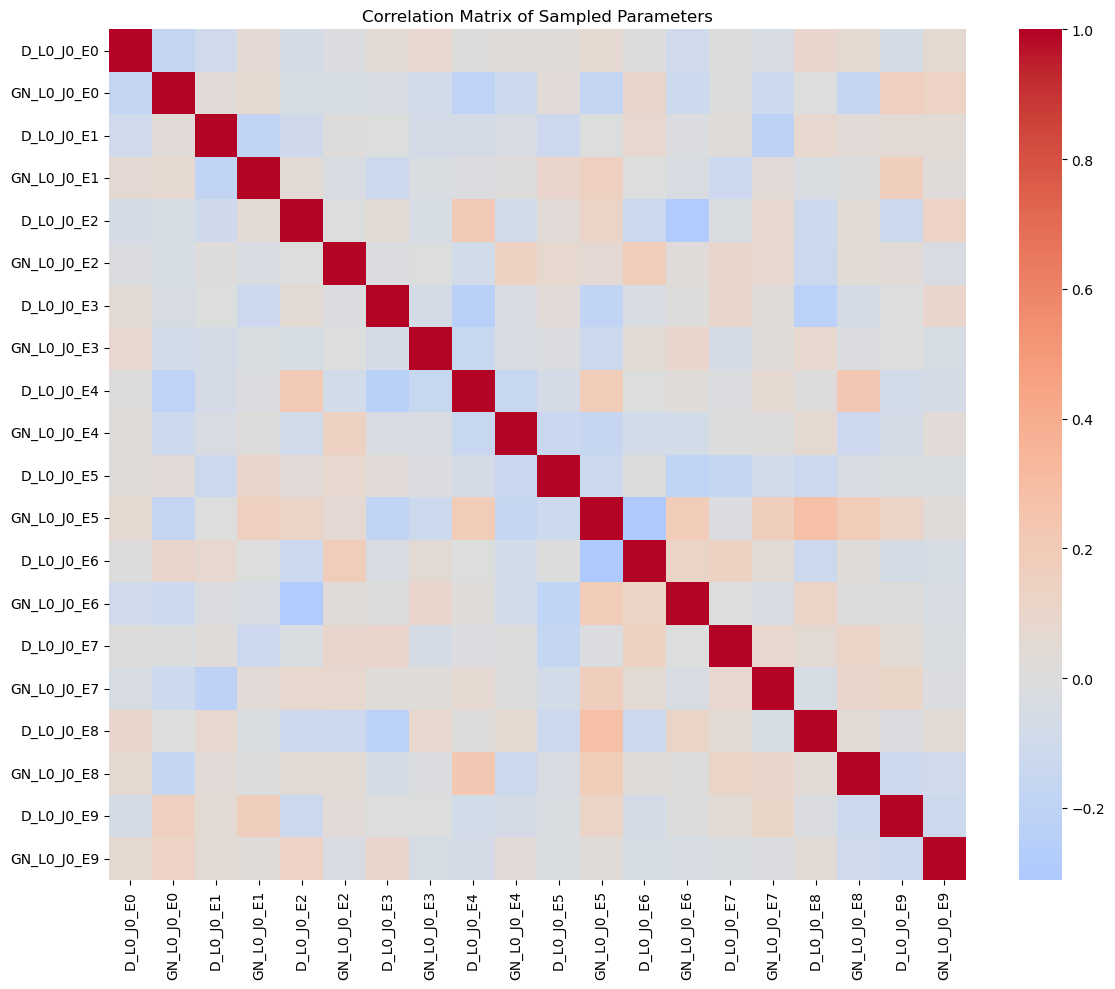

In [8]:
# Compute the correlation matrix using the samples
corr_matrix = actual_samples.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Sampled Parameters')
plt.tight_layout()
plt.show()
